<a href="https://colab.research.google.com/github/palak-chaturvedi/basic_projects/blob/master/AMAZON_BOOKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip3 install fuzzywuzzy


In [10]:
import pandas as pd
import numpy as np
import missingno
import fuzzywuzzy
from fuzzywuzzy import process
import collections
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [11]:
# Reading data
bestsellers = pd.read_csv('bestsellers with categories.csv') # Loading data
bestsellers.head() # Displaying the first 5 lines of the dataset


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [12]:
print(f'Data contaion {bestsellers.shape[0]} records and {bestsellers.shape[1]} columns.')

Data contaion 550 records and 7 columns.


In [13]:
bestsellers.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [14]:
bestsellers.Genre=bestsellers.Genre.astype('category')
bestsellers.dtypes

Name             object
Author           object
User Rating     float64
Reviews           int64
Price             int64
Year              int64
Genre          category
dtype: object

In [15]:
# loop through the columns and check the missing values
for col in bestsellers.columns:
    pct_missing=bestsellers[col].isnull().mean()
    print(f'{col}-{pct_missing :.1%}')

Name-0.0%
Author-0.0%
User Rating-0.0%
Reviews-0.0%
Price-0.0%
Year-0.0%
Genre-0.0%


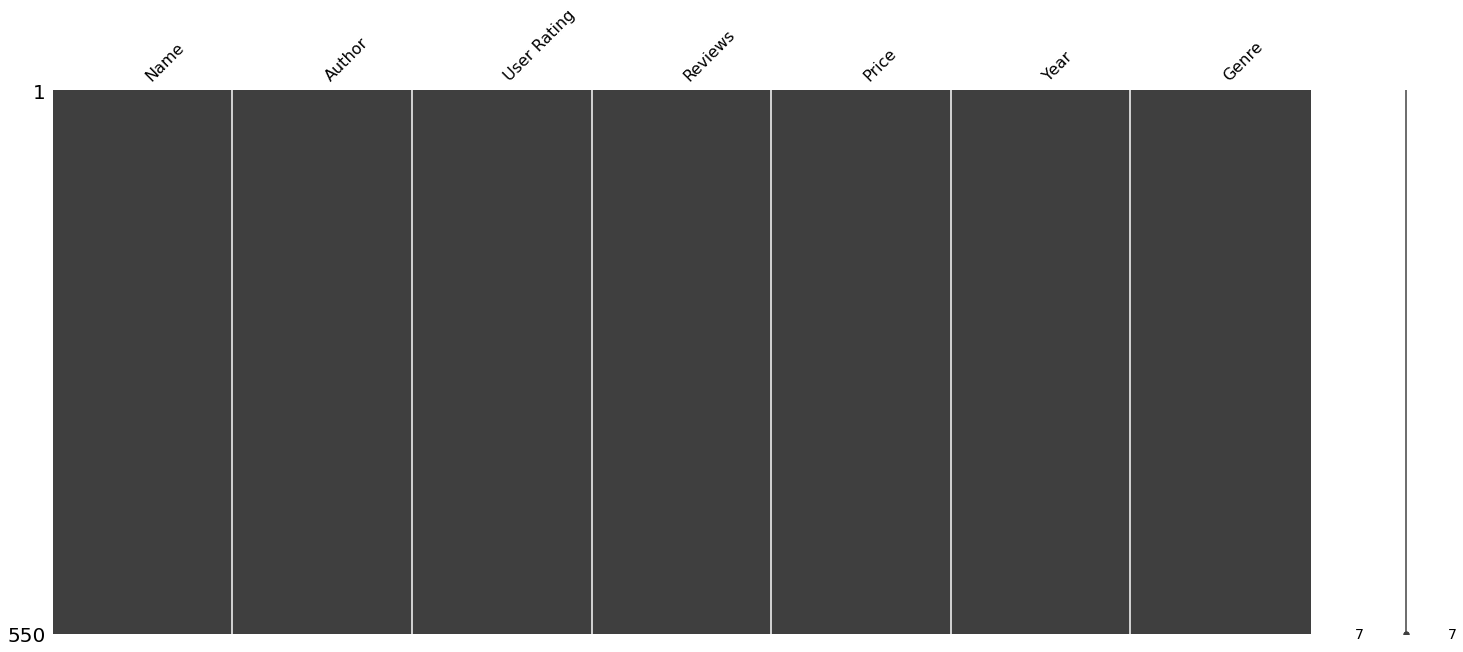

In [16]:
#Build a matrix of missing values
missingno.matrix(bestsellers,fontsize=16)
plt.show()

In [17]:
#Forming categorical columns
col_name_without_numeric_data=list(bestsellers.select_dtypes(exclude=('int','float')).columns)
print(f'Сolumns without numeric data: {", ".join(col_name_without_numeric_data)}.')

Сolumns without numeric data: Name, Author, Genre.


In [18]:
#Let's see the duplicates in the columns
for col in col_name_without_numeric_data:
    if bestsellers[col].duplicated().any()==True:
        print(f'Column {col} contains duplicates.')
    else:
        print(f'Column {col} does not contain duplicates')

Column Name contains duplicates.
Column Author contains duplicates.
Column Genre contains duplicates.


In [19]:
#check if spelling errors have been hit
for col in col_name_without_numeric_data:
    print(f'Before {col}:{len(set(bestsellers[col]))} After {col}: {len(set(bestsellers[col].str.title().str.strip()))}')

Before Name:351 After Name: 350
Before Author:248 After Author: 248
Before Genre:2 After Genre: 2


In [20]:
#Correct the errors
bestsellers.Name=bestsellers.Name.str.title().str.strip()

In [21]:
#Check
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(bestsellers[col]))} After {col}: {len(set(bestsellers[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 248 After Author: 248
Before Genre: 2 After Genre: 2


In [22]:
#Check the column Author
authors=bestsellers.Author.sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [23]:
#Replace the Author name 
bestsellers=bestsellers.replace('George R. R. Martin', 'George R.R. Martin')
bestsellers=bestsellers.replace('J. K. Rowling', 'J.K. Rowling')

In [24]:
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(bestsellers[col]))} After {col}: {len(set(bestsellers[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 246 After Author: 246
Before Genre: 2 After Genre: 2


In [25]:
#Check the column Genre
genre=bestsellers.Genre.unique()
genre

['Non Fiction', 'Fiction']
Categories (2, object): ['Non Fiction', 'Fiction']

In [26]:
#Check the column Year
years=list(bestsellers.Year.unique())
sorted(years)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [27]:
#Display the last 5 lines
bestsellers.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [28]:
#Delete the year column
del bestsellers['Year']

In [29]:
#Remove duplicates and check how many books are left in the data
bestsellers=bestsellers.drop_duplicates(keep='first')
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         361 non-null    object  
 1   Author       361 non-null    object  
 2   User Rating  361 non-null    float64 
 3   Reviews      361 non-null    int64   
 4   Price        361 non-null    int64   
 5   Genre        361 non-null    category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 17.4+ KB


In [30]:
#Count the number of each book in the data
count_books=collections.Counter(bestsellers.Name.tolist())
print(count_books.most_common(11))

[('The Help', 3), ('Gone Girl', 2), ("Quiet: The Power Of Introverts In A World That Can'T Stop Talking", 2), ('The 5 Love Languages: The Secret To Love That Lasts', 2), ('The 7 Habits Of Highly Effective People: Powerful Lessons In Personal Change', 2), ('The Fault In Our Stars', 2), ('The Girl On The Train', 2), ('The Immortal Life Of Henrietta Lacks', 2), ('To Kill A Mockingbird', 2), ('Unbroken: A World War Ii Story Of Survival, Resilience, And Redemption', 2), ('10-Day Green Smoothie Cleanse', 1)]


In [31]:
#Display information on the book 'The Help'
bestsellers[bestsellers['Name']=='The Help']

,Name,Author,User Rating,Reviews,Price,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,Fiction


In [32]:
#Drop duplicates
bestsellers=bestsellers.drop_duplicates(subset='Name',keep='last')
bestsellers

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


In [33]:
#We take all authors with the highest average rating
top_13_authors=bestsellers.groupby('Author')[['User Rating']].mean().sort_values('User Rating', ascending=False).head(13).reset_index()

#Authors who have written the most bestsellers
number_of_books_written=bestsellers.groupby('Author')[['Name']].count().sort_values('Name', ascending=False).head(10).reset_index()

# We take books with the number of reviews
books_with_the_number_of_reviews = bestsellers.groupby('Name')[['Reviews']].sum().sort_values('Reviews', ascending=False).head(5).reset_index()

# We take the number of books by genre
number_of_books_by_genre = bestsellers.groupby('Genre')[['Name']].count().sort_values('Name', ascending=False).head(10).reset_index()
#Setting the visualization parameters
fig_1=make_subplots(rows=1,cols=1,subplot_titles=(''))#set the number of rows and columns

#Setting table parameters
fig_1.add_trace(go.Table(columnorder=[1,2],columnwidth=[100,50],
                         header=dict(values=top_13_authors.columns,
                                     line_color='darkslategray',
                                     fill_color='Salmon',
                                     height=30),
                         cells=dict(values=[top_13_authors['Author'],
                                    top_13_authors['User Rating']], 
                                    line_color='darkslategray',
                                    fill_color='White')))
# Setting the parameters of the chart 
fig_1.update_layout(showlegend=False, 
                    title_text='Top 13 best authors', 
                    title_font_size=16, 
                    title_font_family='Arial', 
                    title_x=0.5,
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))
# Displaying the graph
fig_1.show()

# Let's set the visualization parameters
fig_2 = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'xy'}, {"type": "xy"}]],
                      subplot_titles=("Top 10 authors by number of bestsellers", 
                                      "Top 5 books by number of reviews"))
# Setting Bar parameters
fig_2.add_trace(go.Bar(x=number_of_books_written['Author'], 
                       y=number_of_books_written['Name'],
                       name ='Count books',
                       marker_color=['#ff6666','#f76e6e', '#f07575', '#e87d7d', '#e08585',
                                     '#d98c8c', '#d19494', '#c99c9c', '#c2a3a3', '#baabab']),
                       row=1, col=1)

# Setting Bar parameters
fig_2.add_trace(go.Bar(x=books_with_the_number_of_reviews['Name'], 
                       y=books_with_the_number_of_reviews['Reviews'],
                       marker_color=['#ff6666','#f47171', '#e87d7d', '#dd8888', '#d19494'],
                       name ='Reviews'),
                       row=1, col=2)

# Setting the parameters of the chart when displaying
fig_2.update_traces(marker_line_color='Gray',
                    marker_line_width=1)

# Setting the parameters of the chart when displaying
fig_2.update_layout(showlegend=False, 
                    plot_bgcolor='rgba(0,0,0,0)',
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_2.show()

# Let's set the visualization parameters
fig_3 = make_subplots(rows=1, cols=1,
                      specs=[[{'type': 'domain'}]],
                      subplot_titles=(""))
# Setting Pie parameters
fig_3.add_trace(go.Pie(values=number_of_books_by_genre['Name'],
                       title='Genre',
                       labels=['Non Fiction', 'Fiction'],
                       textinfo='label+percent',
                       insidetextorientation='radial',
                       hole=0.3,
                       marker=dict(colors=['Gray','Salmon'], 
                                   line_color='Gray', 
                                   line_width=1),
                       textfont={'color': '#FFFFFF', 'size': 12},
                       textfont_size=12))

# Setting the parameters of the chart when displaying
fig_3.update_layout(margin_t=30, 
                    showlegend=False, 
                    title_text='Count of books genre', 
                    title_x=0.5, 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_3.show()

ValueError: ignored

In [ ]:
#Display measures of the central trend
bestsellers.describe().T

In [ ]:
# Let's set the visualization parameters
fig_4 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_4.add_trace(go.Box(x=bestsellers['User Rating'], 
                       name='User Rating'))

# Setting the parameters of the Box when displaying
fig_4.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_4.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))
# Displaying the Box
fig_4.show()

# Let's set the visualization parameters
fig_5 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_5.add_trace(go.Box(x=bestsellers['Reviews'], 
                       name='Reviews'))

# Setting the parameters of the Box when displaying
fig_5.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_5.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))
# Displaying the Box
fig_5.show()

# Let's set the visualization parameters
fig_6 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_6.add_trace(go.Box(x=bestsellers['Price'], 
                       name='Price'))

# Setting the parameters of the Box when displaying
fig_6.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_6.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))
# Displaying the Box
fig_6.show()

INSIGHT: By analyzing the numeric data, it is established:

User Rating:

Data is not distributed normally. Asymmetry is observed.
Average and median book ratings are 4.6.
There are outliers in the data. There are a small number of books in the data below the 4.1 rating.
Reviews:

Data is not distributed normally. Asymmetry is observed.
The data has a wide range.
There are outliers in the data. There are a small number of books receiving reviews well above the 75 percentile.
Price:

Data is not distributed normally. Asymmetry is observed.
There are books that cost much higher than the average, as well as books with a cost of 0, which is strange.There are books that cost much higher than the average, as well as books with a cost of 0, which is strange. Either the book is given for free or this error.
Let's look at the correlation in the data.

In [ ]:
# Building a correlation matrix and building a correlation matrix and visualizing relationships
bestsellers.corr()

In [ ]:
# Let's set the visualization parameters
fig_7 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_7.add_trace(go.Scattergl(x=bestsellers['User Rating'],
                             y=bestsellers['Reviews'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_7.update_layout(template='simple_white',
                    showlegend=False, 
                    xaxis = {'title':'User Rating'}, 
                    yaxis = {'title':'Reviews'},
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Scatter
fig_7.show()

# Let's set the visualization parameters
fig_8 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_8.add_trace(go.Scattergl(x=bestsellers['User Rating'],
                             y=bestsellers['Price'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_8.update_layout(template='simple_white',
                    showlegend=False,
                    xaxis = {'title':'User Rating'}, 
                    yaxis = {'title':'Price'},
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Scatter
fig_8.show()

# Let's set the visualization parameters
fig_9 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_9.add_trace(go.Scattergl(x=bestsellers['Price'],
                             y=bestsellers['Reviews'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_9.update_layout(template='simple_white',
                    showlegend=False, 
                    xaxis = {'title':'Price'}, 
                    yaxis = {'title':'Reviews'},
                    font=dict(family='Arial', size=12, color='black'))

# Displaying the Scatter
fig_9.show()

INSIGHT: Based on the constructed correlation matrix as well as the constructed visualizations, it can be seen that the data does not contain any positive or negative linear relationship between the rating, reviews and the price of books.

Now I want to test the following hypothesis: "Do genres differ in terms of rating?"

We will test the hypothesis according to the following algorithm:

Null and alternative hypotheses are formulated.
The distribution was checked for normality using "Shapiro Wilk test of normality".
Two samples were formed. Books related to the Non Fiction genre and books related to the Fiction genre.
Testing was carried out in order to identify statistical differences between the study groups.
Let us formulate the null and alternative hypotheses.

H0 - There are no differences between genre rating

H1 - There are differences between genre rating

In [ ]:
#Checking the distribution for normality. Using "Shapiro Wilk test of normality"
#Set the alpha level
alpha=0.05

#We pass groups to the criterion for testing
stat,pval=shapiro(bestsellers['User Rating'])

print('Statistic:', f'{stat:.3f}')
print('P-Value:',f'{pval:.20f}')

#Checking the condition for accepting or rejecting H0
if pval>alpha:
    print('Accept H0 - Data is distributed normally.')
if pval<alpha:
    print('Reject H0 - Data is not distributed normally.')

In [ ]:
#Create group
non_fiction=bestsellers[bestsellers['Genre']=='Non Fiction']['User Rating']
fiction=bestsellers[bestsellers['Genre']=='Fiction']['User Rating']

In [ ]:
# Set the alpha level
alpha=0.05

# We pass groups to the criterion for testing
stat, pval = mannwhitneyu(non_fiction, fiction)

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
 
# Checking the condition for accepting or rejecting H0
if pval > alpha:
    print('Accept H0 - There is no significant difference between the groups.')
if pval < alpha:
    print('Reject H0 - There are significant differences between the groups.')

In [ ]:
print(f'Non_fiction median: {non_fiction.median()}, Fiction median: {fiction.median()}')

In [ ]:
# Create distplot with curve_type set to 'normal'
fig_10 = ff.create_distplot([non_fiction, fiction], 
                         ['Non_fiction', 'Fiction'], 
                         colors=['salmon', 'gray',],
                         bin_size=.1, 
                         show_rug=False)

# Add title
fig_10.update_layout(title_text='Сomparison of the distribution density in the group Non_fiction and the group', 
                     template='simple_white',
                     font=dict(family='Arial', size=12, color='black'))
fig_10.show()

INSIGHT: As a result of the testing, statistically significant differences were obtained between the compared groups. Based on the results obtained, it can be argued that users evaluate books differently depending on the genre, and based on the median values, readers give preference to works of fiction.

5.Final Conclusions
In the course of the analysis, it was established which authors receive the highest ratings from readers, which authors have written the most bestsellers, which books receive the most reviews from readers. In addition, it was found that non-fiction literature is becoming more often a bestseller, but users also like fiction more, which is confirmed by the statistically significant results obtained during the testing.